In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

#### Data preprocessing
- Delete rows with missing data
- Mapping non-numeric data to numeric data

In [ ]:
data = pd.read_csv('../input/adult.csv')
# Delete rows with missing data
data = data.loc[(data['workclass']!='?') & (data['occupation']!='?') & (data['native.country']!='?')]

In [ ]:
def mapping(column_str):
    data_ = data[column_str]
    list_ = list(set(data_))
    map_ = {}
    for i in range(len(list_)):
        map_[list_[i]] = i
    return data_.map(map_)

# Mapping non-numeric data to numeric data
non_numeric = ["workclass", "marital.status", "occupation", "relationship", "race", "sex", "native.country", "income"]
for column in non_numeric:
    data[column] = mapping(column)

In [ ]:
X = data[['age','workclass', 'education.num', 'marital.status','occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']]
Y = data["income"]

In [ ]:
# split data to train and test
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=2019)

#### Build and train the model
- using a verity of traditional models
- metrics: accuracy, F1_score, auc

In [16]:
#LR
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X, train_Y)
pred_Y = lr.predict(test_X)
print('LR:')
print('accuracy %s' % metrics.accuracy_score(test_Y, pred_Y))
print('F1_score %s' % metrics.f1_score(test_Y, pred_Y))
print('auc %s' % metrics.roc_auc_score(test_Y, pred_Y))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR:
accuracy 0.8253547274897228
F1_score 0.8895597484276729
auc 0.7140803445065882


In [17]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1, 31)
accuracy_scores = []
F1_scores = []
auc_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_Y)
    pred_Y = knn.predict(test_X)
    accuracy_scores.append(metrics.accuracy_score(test_Y, pred_Y))
    F1_scores.append(metrics.f1_score(test_Y, pred_Y))
    auc_scores.append(metrics.roc_auc_score(test_Y, pred_Y))
print('KNN:')
print('accuracy : %s' % accuracy_scores.index(max(accuracy_scores)), max(accuracy_scores))
print('F1_score : %s' % F1_scores.index(max(F1_scores)), max(F1_scores))
print('auc : %s' % auc_scores.index(max(auc_scores)), max(auc_scores))

KNN:
accuracy : 24 0.8494894576316139
F1_score : 24 0.9034946007992518
auc : 3 0.7889368789307581


Text(0, 0.5, 'auc')

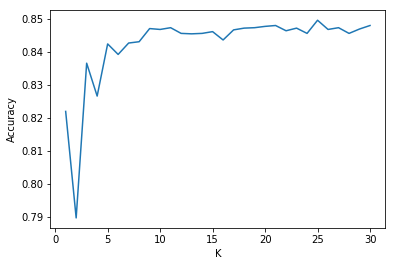

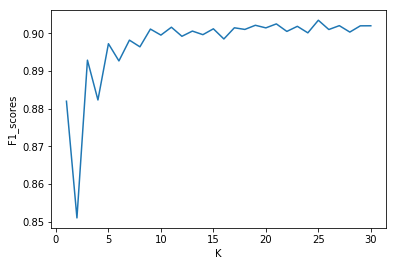

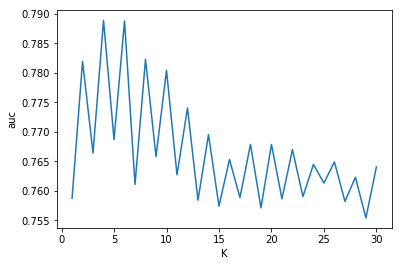

In [18]:
#plot k and metrics in knn model
#accuracy
plt.figure(1)
plt.plot(k_range, accuracy_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
#F1_score
plt.figure(2)
plt.plot(k_range, F1_scores)
plt.xlabel('K')
plt.ylabel('F1_scores')
#auc
plt.figure(3)
plt.plot(k_range, auc_scores)
plt.xlabel('K')
plt.ylabel('auc')

In [19]:
# Decision Tree
from sklearn import tree
deep_range = np.arange(1,21)
accuracy_scores = []
F1_scores = []
auc_scores = []
for max_deep in deep_range:
    dt = tree.DecisionTreeClassifier(max_depth=max_deep)
    dt = dt.fit(train_X, train_Y)
    pred_Y = dt.predict(test_X)
    accuracy_scores.append(metrics.accuracy_score(test_Y, pred_Y))
    F1_scores.append(metrics.f1_score(test_Y, pred_Y))
    auc_scores.append(metrics.roc_auc_score(test_Y, pred_Y))
print('Decision Tree:')
print('accuracy : %s' % accuracy_scores.index(max(accuracy_scores)), max(accuracy_scores))
print('F1_score : %s' % F1_scores.index(max(F1_scores)), max(F1_scores))
print('auc : %s' % auc_scores.index(max(auc_scores)), max(auc_scores))

Decision Tree:
accuracy : 9 0.8508155417053441
F1_score : 7 0.9055499832831829
auc : 11 0.7821913479804133


Text(0, 0.5, 'auc')

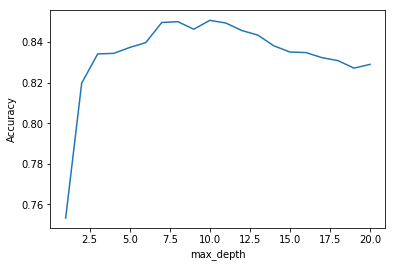

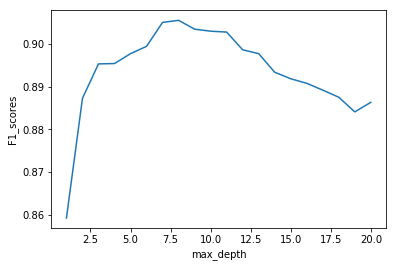

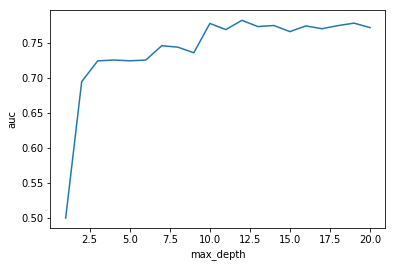

In [20]:
#plot max_depth in decision tree model and metrics
#accuracy
plt.figure(1)
plt.plot(deep_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
#F1_score
plt.figure(2)
plt.plot(deep_range, F1_scores)
plt.xlabel('max_depth')
plt.ylabel('F1_scores')
#auc
plt.figure(3)
plt.plot(deep_range, auc_scores)
plt.xlabel('max_depth')
plt.ylabel('auc')

In [21]:
#NB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(train_X, train_Y)
pred_Y = nb.predict(test_X)
print('NB:')
print('accuracy %s' % metrics.accuracy_score(test_Y, pred_Y))
print('F1_score %s' % metrics.f1_score(test_Y, pred_Y))
print('auc %s' % metrics.roc_auc_score(test_Y, pred_Y))

NB:
accuracy 0.7981700039782522
F1_score 0.8759778357235984
auc 0.646176663689823


In [22]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=80, max_features='auto', max_depth=15)
rf = rf.fit(train_X, train_Y)
pred_Y = rf.predict(test_X)
print('Random Forest:')
print('accuracy %s' % metrics.accuracy_score(test_Y, pred_Y))
print('F1_score %s' % metrics.f1_score(test_Y, pred_Y))
print('auc %s' % metrics.roc_auc_score(test_Y, pred_Y))

Random Forest:
accuracy 0.859567696591964
F1_score 0.9101552557902775
auc 0.7725592404507647


In [23]:
#GB
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=4)
gbc = gbc.fit(train_X, train_Y)
pred_Y = gbc.predict(test_X)
print('GBC:')
print('accuracy %s' % metrics.accuracy_score(test_Y, pred_Y))
print('F1_score %s' % metrics.f1_score(test_Y, pred_Y))
print('auc %s' % metrics.roc_auc_score(test_Y, pred_Y))

GBC:
accuracy 0.8669937674048535
F1_score 0.9138242117020363
auc 0.7959145658475302


In [24]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm = svm.fit(train_X, train_Y)
pred_Y = svm.predict(test_X)
print('SVM:')
print('accuracy %s' % metrics.accuracy_score(test_Y, pred_Y))
print('F1_score %s' % metrics.f1_score(test_Y, pred_Y))
print('auc %s' % metrics.roc_auc_score(test_Y, pred_Y))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM:
accuracy 0.8176634398620872
F1_score 0.8874519112711794
auc 0.6773619078793016


In [26]:
#Neural Networks
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
model=Sequential([
    BatchNormalization(input_shape=(12,)),
    Dense(16,activation='relu'),
    Dropout(0.5),
    Dense(8,activation='relu'),
    Dropout(0.5),
    Dense(4,activation='relu'),
    Dense(1,activation='sigmoid'),
])
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=train_X, y=train_Y, batch_size=256, epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
22621/22621 [==============================] - 1s 45us/step - loss: 0.6308 - acc: 0.7497
Epoch 2/30
22621/22621 [==============================] - 0s 8us/step - loss: 0.5402 - acc: 0.7504
Epoch 3/30
22621/22621 [==============================] - 0s 8us/step - loss: 0.5028 - acc: 0.7518
Epoch 4/30
22621/22621 [==============================] - 0s 8us/step - loss: 0.4776 - acc: 0.7524
Epoch 5/30
22621/22621 [==============================] - 0s 9us/step - loss: 0.4616 - acc: 0.7582
Epoch 6/30
22621/22621 [==============================] - 0s 10us/step - loss: 0.4476 - acc: 0.7672
Epoch 7/30
22621/22621 [==============================] - 0s 10us/step - loss: 0.4379 - acc: 0.7747
Epoch 8/30
22621/22621 [==============================] - 0s 10us/step - loss: 0.4345 - acc: 0.7756
Epoch 9/30
22621/22621 [==============================] - 0s 10us/step - loss: 0.4325 - acc: 0.7799
Epoch 10/30
22621/22621 [==============================]

In [27]:
y_pred = np.squeeze(model.predict_classes(test_X))
print('Nerual Network:')
print('accuracy %s' % metrics.accuracy_score(test_Y, pred_Y))
print('F1_score %s' % metrics.f1_score(test_Y, pred_Y))
print('auc %s' % metrics.roc_auc_score(test_Y, pred_Y))

Nerual Network:
accuracy 0.8176634398620872
F1_score 0.8874519112711794
auc 0.6773619078793016


#### Compare different models
|model|accuracy|F1_score|auc|
|---|---
|LR|0.82|0.88|0.71|
|KNN|0.84|0.90|0.78|
|Decision Tree|0.85|0.90|0.78|
|NB|0.79|0.87|0.64|
|Random Forest|0.85|0.91|0.77|
|GB|0.86|0.91|0.79|
|SVM|0.81|0.88|0.67|
|Neural Networks|0.81|0.88|0.67|

GBC get the best scores in all these three metrics.